# Load Packages

In [1]:
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
import warnings
import itertools
#from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Electric_Production1.csv')

In [3]:
df.head()

,Date,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        397 non-null    object 
 1   IPG2211A2N  397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [5]:
df.Date = pd.to_datetime(df.Date)

In [6]:
df = df.set_index("Date")
df.head()

,IPG2211A2N
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [7]:
df.index.freq = 'MS'

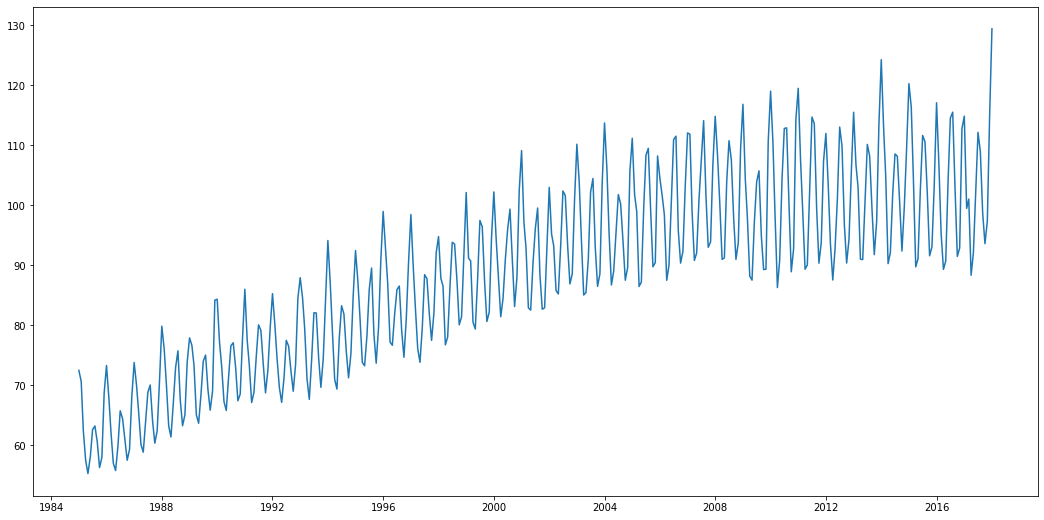

In [8]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["IPG2211A2N"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Electrical production Production')
plt.show();

# Decomposition plot

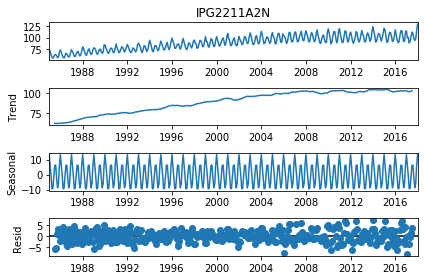

In [9]:
a = seasonal_decompose(df["IPG2211A2N"], model = "add")
a.plot();

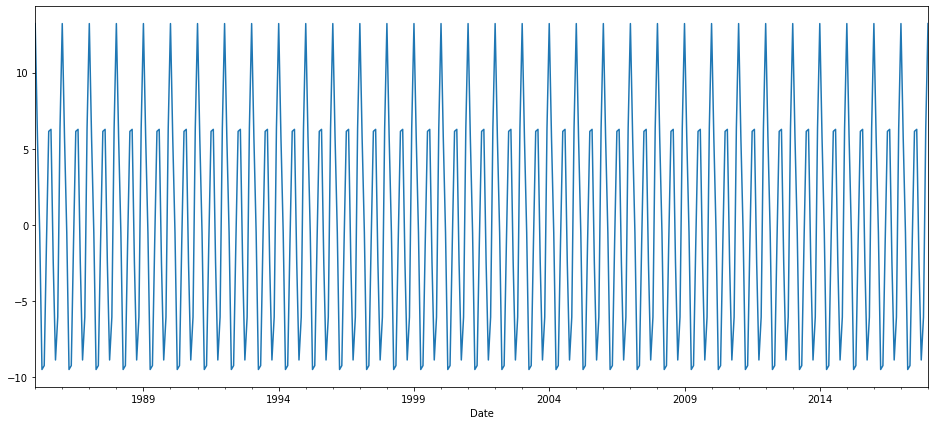

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot();

# Prophet

In [11]:
train_data = df[:len(df)-30]
test_data = df[len(df)-30:]

In [12]:
df_pr = df.copy()
df_pr = df.reset_index()

In [13]:
df_pr.columns = ['ds','y'] # To use prophet column names should be ds and y

In [14]:
train_data_pr = df_pr.iloc[:len(df)-30]
test_data_pr = df_pr.iloc[len(df)-30:]

In [15]:
from fbprophet import Prophet

In [16]:
m = Prophet()
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=30,freq='MS')
prophet_pred = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
prophet_pred.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
392,2017-09-01,104.602059,98.188009,105.141636,104.441712,104.760294,-2.945799,-2.945799,-2.945799,-2.945799,-2.945799,-2.945799,0.0,0.0,0.0,101.656260
393,2017-10-01,104.633871,92.250625,98.824207,104.462170,104.803075,-8.983654,-8.983654,-8.983654,-8.983654,-8.983654,-8.983654,0.0,0.0,0.0,95.650217
394,2017-11-01,104.666744,95.170387,102.139123,104.485174,104.849945,-6.059311,-6.059311,-6.059311,-6.059311,-6.059311,-6.059311,0.0,0.0,0.0,98.607433
395,2017-12-01,104.698556,107.542647,114.422044,104.503757,104.896278,6.320851,6.320851,6.320851,6.320851,6.320851,6.320851,0.0,0.0,0.0,111.019407
396,2018-01-01,104.731428,114.087455,120.916814,104.528206,104.939399,12.667166,12.667166,12.667166,12.667166,12.667166,12.667166,0.0,0.0,0.0,117.398595


In [18]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-30:]['ds'], "Pred" : prophet_pred[-30:]["yhat"]})

In [19]:
prophet_pred = prophet_pred.set_index("Date")

In [20]:
prophet_pred.index.freq = "MS"

In [21]:
prophet_pred

,Pred
Date,
2015-08-01,110.329655
2015-09-01,100.961031
2015-10-01,94.579489
2015-11-01,97.367263
2015-12-01,109.009705
2016-01-01,117.138351
2016-02-01,110.768465
2016-03-01,103.118116
2016-04-01,95.196602


In [22]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [23]:
import seaborn as sns

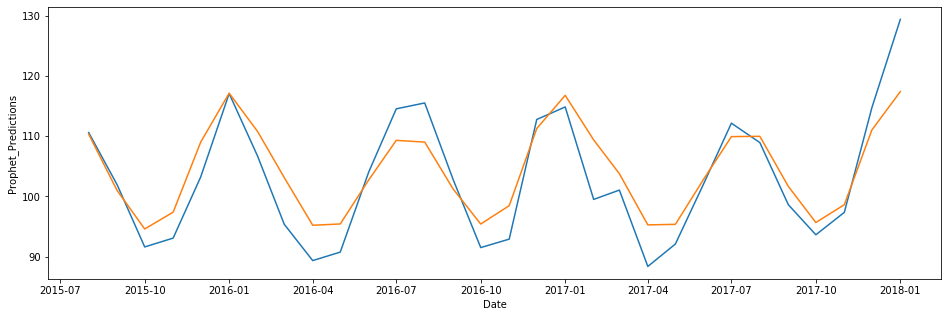

In [24]:
plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["IPG2211A2N"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [25]:
prophet_rmse_error = rmse(test_data['IPG2211A2N'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error**2
mean_value = df['IPG2211A2N'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 22.14673794619021
RMSE Error: 4.706032080871338
Mean: 88.84721763224182


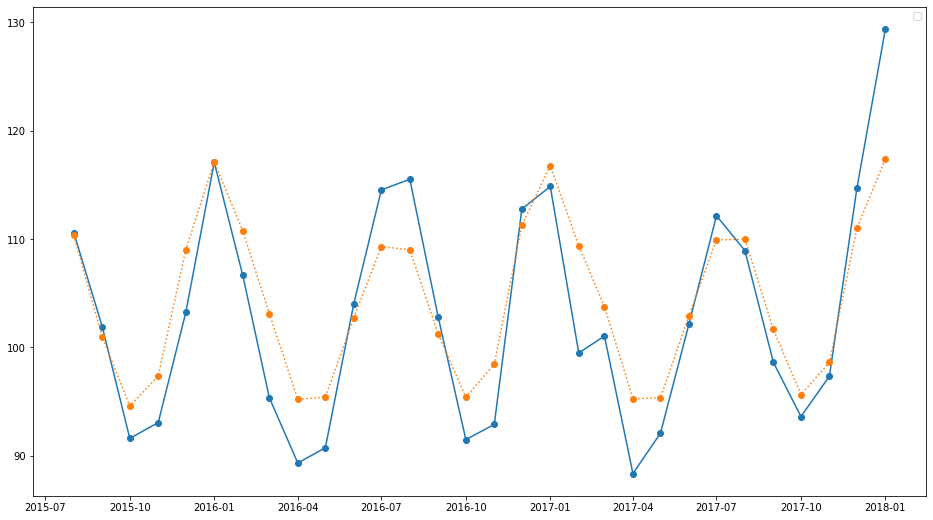

In [26]:
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["IPG2211A2N"], linestyle="-")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [27]:
rmse_errors = [prophet_rmse_error]
mse_errors = [prophet_mse_error]
errors = pd.DataFrame({"Model" : ["Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})

In [28]:
print(f"Mean: {test_data['IPG2211A2N'].mean()}")
errors

Mean: 102.87691


,Model,RMSE Errors,MSE Errors
0,Prophet,4.706032,22.146738


In [29]:
test_data

,IPG2211A2N,Prophet_Predictions
Date,,
2015-08-01,110.5925,110.329655
2015-09-01,101.9204,100.961031
2015-10-01,91.5959,94.579489
2015-11-01,93.0628,97.367263
2015-12-01,103.2203,109.009705
2016-01-01,117.0837,117.138351
2016-02-01,106.6688,110.768465
2016-03-01,95.3548,103.118116
2016-04-01,89.3254,95.196602
